<a href="https://colab.research.google.com/github/vmagdangal/acnh-best-museum-month-analysis/blob/main/ACNH_Museum_Months.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Which Month Benefits Both the Museum and Player the Most in *Animal Crossing: New Horizons*?

---



This dataset comes from [Kaggle](https://www.kaggle.com/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset), which features multiple CSVs of categorized content from the 2020 video game, *Animal Crossing: New Horizons*. In the game, the player can donate fish, sea creatures, bugs, fossils, and art to a museum. Certain critters only appear during certain months depending on the player's hemisphere, so I aim to answer: **Which month is the most productive for museum donations and player income?** As fossils and art are completely randomized and can be obtained year-round, I will only analyze fish, sea creatures, and bugs. As I live in the Northern Hemisphere, I will only pay attention to the months labeled "NH". Note that all results found are identical to the Southern Hemisphere, just shifted 6 months apart.

The Kaggle dataset also did not include a CSV for sea creatures, so I created my own CSV using [Nookipedia](https://nookipedia.com/wiki/Sea_creature/New_Horizons), a community-run wiki for all things Animal Crossing. The `insects.csv` file was also renamed to `bugs.csv` to better represent its contents.

# Objective

- Which month is the most productive for museum donations and player income in *Animal Crossing: New Horizons*?

# Fetching Data

- The Pandas library is imported to be able to read the CSV.

In [ ]:
# Upload 3 Files: fish.csv, sea_creatures.csv, insects.csv
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

df_fish = pd.read_csv('/content/fish.csv')
df_bug = pd.read_csv('/content/bugs.csv')
df_sea_creatures = pd.read_csv('/content/sea_creatures.csv')

df_list = [df_fish, df_bug, df_sea_creatures]

# Data Cleaning

Within each month in the dataset, the values are the specific hours of the day that a critter is available. To find the most productive donation months, we just need to know the monthly availability, so we will turn these columns into booleans, where `True` means they are available and `False` meaning unavailable.

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
hemispheres = ["NH ", "SH "]

for df in df_list:
  for hemisphere in hemispheres:
    for month in months:
      col = hemisphere + month
      if(df[col].dtype != bool):
        df[col] = df[col].notna()


## Merging Data
We have 3 CSVs to read from, but it would be better if we would only have to read one. We will only keep the columns that we need and add an additional column for the type of donation.

In [ ]:
df_fish["Type"] = "Fish"
df_bug["Type"] = "Bug"
df_sea_creatures["Type"] = "Sea Creature"

In [ ]:
col_to_keep = ["Name", "Sell", "Type"]

for month in months:
  col_to_keep.append("NH " + month)

df_fish = df_fish.drop(df_fish.columns.difference(col_to_keep), axis=1)
df_bug = df_bug.drop(df_bug.columns.difference(col_to_keep), axis=1)
df_sea_creatures = df_sea_creatures.drop(df_sea_creatures.columns.difference(col_to_keep), axis=1)

df = pd.concat([df_fish, df_bug, df_sea_creatures])

# Data Plotting

## Monthly Critters by Type

First, we can find the amount of unique critters you can find to see how many appear in which month.

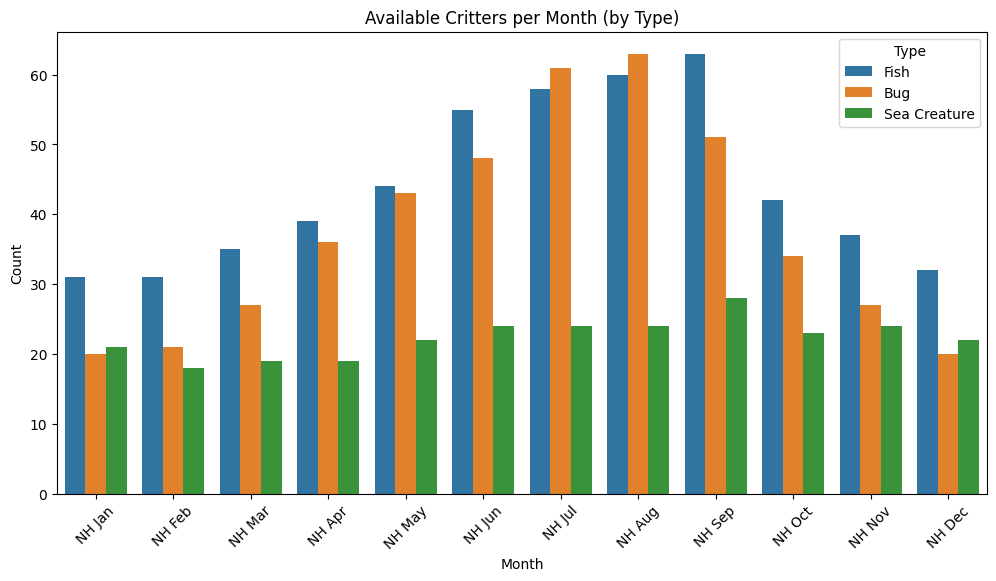

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

nh_months = []
for month in months:
  nh_months.append("NH " + month)

df_nh_months = df[["Type"] + nh_months]

df_melt = df_nh_months.melt(id_vars=["Type"], var_name="Month", value_name="Available")
df_melt = df_melt[df_melt["Available"]]

monthly_counts = df_melt.groupby(["Type", "Month"]).size().reset_index(name="Count")

hue_order = ["Fish", "Bug", "Sea Creature"]
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_counts,
            x="Month", y="Count", hue="Type",
            order=nh_months,
            hue_order=hue_order)

plt.xticks(rotation=45)
plt.title("Available Critters per Month (by Type)")
plt.show()

Based on the chart, we can see that the most available fish are in September, and the most available bugs in August, though the bug count drops in September. There is also a lower amount of sea creatures available in the game compared to bugs and fish.

## Monthly Critters Total

To visualize the numbers, we can ignore the type and sum all of the possible critters for each month.

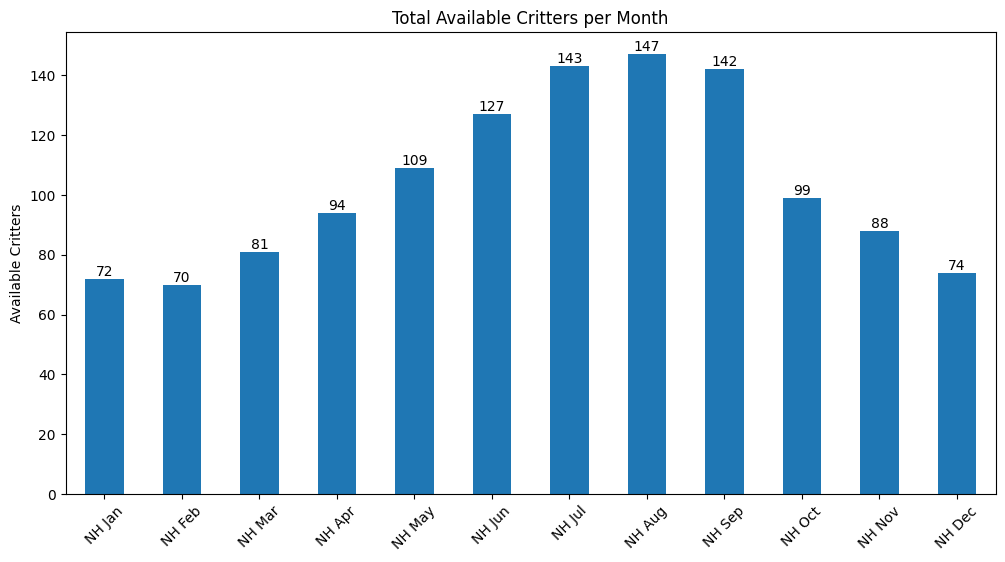

In [ ]:
total_monthly_plot = df[nh_months].sum().plot(kind="bar", figsize=(12,6))
plt.ylabel("Available Critters")
plt.title("Total Available Critters per Month")
plt.xticks(rotation=45)

for index, value in enumerate(df[nh_months].sum()):
    total_monthly_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

## Average Sell Prices for Top Month

Since July, August, and September are the top 3 months with the most unique critters to donate to the museum, we should also see the information on the price of each type of critter to see which month is likely to net the player the most bells.

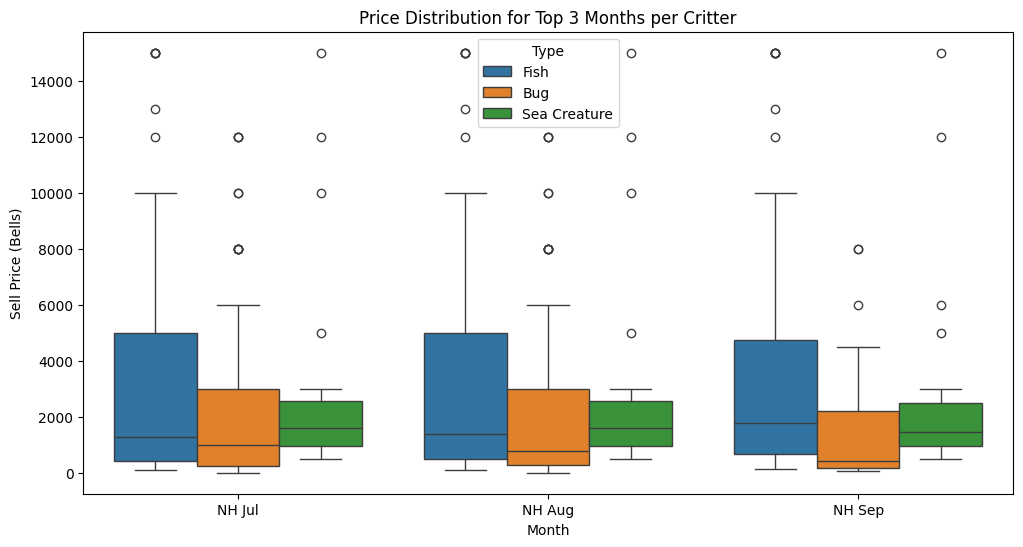

In [ ]:
top_months = ["NH Jul", "NH Aug", "NH Sep"]

df_top3 = []
for month in top_months:
    temp_df = df[df[month]]
    temp_df = temp_df.assign(Month=month)
    df_top3.append(temp_df)

df_top3 = pd.concat(df_top3)

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top3, x="Month", y="Sell", hue="Type")
plt.title("Price Distribution for Top 3 Months per Critter")
plt.ylabel("Sell Price (Bells)")
plt.show()


In [ ]:
df_top3.groupby(["Month", "Type"])["Sell"].describe()

count         mean          std    min    25%     50%  \
Month  Type                                                                  
NH Aug Bug            63.0  2543.492063  3407.805158   10.0  275.0   800.0   
       Fish           60.0  3693.333333  4463.690298  120.0  500.0  1400.0   
       Sea Creature   24.0  3004.166667  3814.671810  500.0  975.0  1600.0   
NH Jul Bug            61.0  2607.213115  3445.510185   10.0  250.0  1000.0   
       Fish           58.0  3671.551724  4559.702515  100.0  425.0  1300.0   
       Sea Creature   24.0  3000.000000  3817.351688  500.0  975.0  1600.0   
NH Sep Bug            51.0  1368.235294  1927.228794   60.0  190.0   430.0   
       Fish           63.0  3829.841270  4562.702048  150.0  675.0  1800.0   
       Sea Creature   28.0  2585.714286  3363.718653  500.0  975.0  1450.0   

                        75%      max  
Month  Type                           
NH Aug Bug           3000.0  12000.0  
       Fish          5000.0  15000.0  
       Sea Creature  2575.0  15000.0  
NH Jul Bug           3000.0  12000.0  
       Fish          5000.0  15000.0  
       Sea Creature  2575.0  15000.0  
NH Sep Bug           2200.0   8000.0  
       Fish          4750.0  15000.0  
       Sea Creature  2500.0  15000.0

# Results

Solely going off of the number of available critters for donation, August has the most. This would make it the single most productive month for museum donations. July and September are very similar in the amount of available critters, but are still less than August.

When it comes to player profit, sea creatures are consistent across all 3 months. Despite having 4 more sea creatures from August to September, the Vampire Squid, which sells for 10,000 bells becomes unavailable, and 4  sea creatures selling for 1,000 - 1,800 become available, dropping the average. To compensate, the Umbrella Octopus becomes available, selling for 6,000 bells, preventing the average from dropping too much.

Fish have the highest average prices across the board, primarily due to the 4 different sharks being available from June to September, ranging from 8,000 - 15,000 bells each. September also introduces several fish that sell for 1,000+ bells. However, All months from July to September are solid for making money off of fishing.

Lastly, bugs make the best profit in July and August, as the available species drops from 63 in August to 51 in September. The average selling price also plummets to 1,368 bells, with all quartiles being lower than past months. This drop happens because all of the stag beetles, which are some of the most valuable bugs in the game, are only available in July and August out of the entire year. 8 out of 16 of these beetles are within the 8,000 - 12,000 bell range. Replacing them are three bugs that range from 400 - 600 bells.

Taking these factors into consideration, **August** seems to be the best overall month for collecting critters for both museum donations and profit. While the impact from sea creatures is low, August is the sweet spot where the most valuable fish and bugs appear. That month also happens to be where the most critters are available, likely due to the 16 tree beetles being present, proven by the number of bugs available on those months are higher than fish.

Best Month: **August** (February for Southern Hemisphere)

## Next Steps

To continue finding the best months for museums, I could look into when certain critters become available during certain months, and having exceptions to critters that are available year-round. I could also look for the best time and location to collect critters, as bugs and fish appear at different spots and may have unique spawn conditions.